# <center> Customer Segmentation Project </center>

## Data Wrangling

In [1]:
#import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#load the dataset
df = pd.read_csv('synthetic_online_retail_data.csv')
df.head()

,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age
0,13542,2024-12-17,784,10,Electronics,Smartphone,2,373.36,Credit Card,New Oliviaberg,1.0,F,56
1,23188,2024-06-01,682,50,Sports & Outdoors,Soccer Ball,5,299.34,Credit Card,Port Matthew,NaN,M,59
2,55098,2025-02-04,684,50,Sports & Outdoors,Tent,5,23.00,Credit Card,West Sarah,5.0,F,64
3,65208,2024-10-28,204,40,Books & Stationery,Story Book,2,230.11,Bank Transfer,Hernandezburgh,5.0,M,34
4,63872,2024-05-10,202,20,Fashion,Skirt,4,176.72,Credit Card,Jenkinshaven,1.0,F,33


In [3]:
#information about data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     1000 non-null   int64  
 1   order_date      1000 non-null   object 
 2   product_id      1000 non-null   int64  
 3   category_id     1000 non-null   int64  
 4   category_name   1000 non-null   object 
 5   product_name    1000 non-null   object 
 6   quantity        1000 non-null   int64  
 7   price           1000 non-null   float64
 8   payment_method  1000 non-null   object 
 9   city            1000 non-null   object 
 10  review_score    799 non-null    float64
 11  gender          897 non-null    object 
 12  age             1000 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


In [4]:
df.describe()

,customer_id,product_id,category_id,quantity,price,review_score,age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,799.000000,1000.000000
mean,55490.723000,540.726000,30.030000,2.947000,251.850660,3.992491,46.382000
std,25910.185857,261.737704,14.370303,1.413573,139.194688,1.239469,16.569992
min,10201.000000,100.000000,10.000000,1.000000,10.720000,1.000000,18.000000
25%,33857.000000,311.750000,20.000000,2.000000,128.525000,3.000000,32.000000
50%,54619.500000,542.500000,30.000000,3.000000,250.220000,4.000000,47.000000
75%,77848.500000,770.750000,40.000000,4.000000,366.467500,5.000000,61.000000
max,99923.000000,995.000000,50.000000,5.000000,499.500000,5.000000,75.000000


In [5]:
df.isnull().sum()

customer_id         0
order_date          0
product_id          0
category_id         0
category_name       0
product_name        0
quantity            0
price               0
payment_method      0
city                0
review_score      201
gender            103
age                 0
dtype: int64

In [6]:
df['review_score'].value_counts()

review_score
5.0    382
4.0    198
3.0    109
1.0     59
2.0     51
Name: count, dtype: int64

In [7]:
#replace missing review score with mean review score
mean = np.ceil(df['review_score'].mean())
mean


np.float64(4.0)

In [8]:
df['review_score'].replace(np.nan, mean, inplace=True) 

C:\Users\Dell\AppData\Local\Temp\ipykernel_24064\3725231224.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review_score'].replace(np.nan, mean, inplace=True)


In [9]:
#check missing value in review score
df['review_score'].isnull().sum()

np.int64(0)

In [10]:
#how many male and female in data
df['gender'].value_counts()

gender
M    457
F    440
Name: count, dtype: int64

In [11]:
df.head()

,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age
0,13542,2024-12-17,784,10,Electronics,Smartphone,2,373.36,Credit Card,New Oliviaberg,1.0,F,56
1,23188,2024-06-01,682,50,Sports & Outdoors,Soccer Ball,5,299.34,Credit Card,Port Matthew,4.0,M,59
2,55098,2025-02-04,684,50,Sports & Outdoors,Tent,5,23.00,Credit Card,West Sarah,5.0,F,64
3,65208,2024-10-28,204,40,Books & Stationery,Story Book,2,230.11,Bank Transfer,Hernandezburgh,5.0,M,34
4,63872,2024-05-10,202,20,Fashion,Skirt,4,176.72,Credit Card,Jenkinshaven,1.0,F,33


In [12]:
#drop missing value rows
df = df.dropna()
df.shape

(897, 13)

In [13]:
# df.to_csv('clean_retail_data.csv')

## Exploratory Data Analysis

In [14]:
df.describe()

,customer_id,product_id,category_id,quantity,price,review_score,age
count,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000
mean,55769.782609,542.783724,29.799331,2.943144,254.225585,3.981048,46.585284
std,25817.538244,261.422764,14.360003,1.418193,138.787820,1.126327,16.576114
min,10211.000000,100.000000,10.000000,1.000000,10.720000,1.000000,18.000000
25%,35088.000000,314.000000,20.000000,2.000000,134.120000,4.000000,32.000000
50%,54710.000000,547.000000,30.000000,3.000000,255.900000,4.000000,47.000000
75%,77850.000000,773.000000,40.000000,4.000000,367.510000,5.000000,61.000000
max,99909.000000,995.000000,50.000000,5.000000,499.500000,5.000000,75.000000


In [15]:
df.head()

,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age
0,13542,2024-12-17,784,10,Electronics,Smartphone,2,373.36,Credit Card,New Oliviaberg,1.0,F,56
1,23188,2024-06-01,682,50,Sports & Outdoors,Soccer Ball,5,299.34,Credit Card,Port Matthew,4.0,M,59
2,55098,2025-02-04,684,50,Sports & Outdoors,Tent,5,23.00,Credit Card,West Sarah,5.0,F,64
3,65208,2024-10-28,204,40,Books & Stationery,Story Book,2,230.11,Bank Transfer,Hernandezburgh,5.0,M,34
4,63872,2024-05-10,202,20,Fashion,Skirt,4,176.72,Credit Card,Jenkinshaven,1.0,F,33


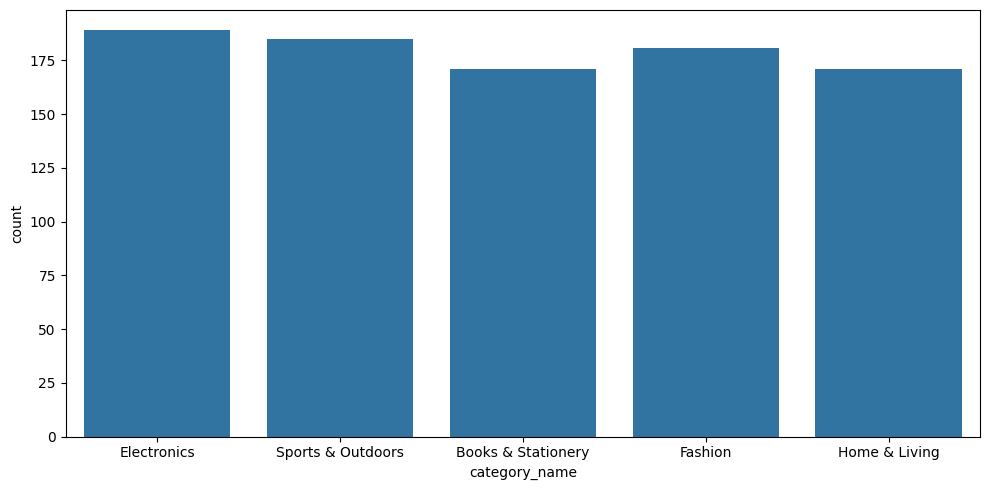

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='category_name')
plt.tight_layout()

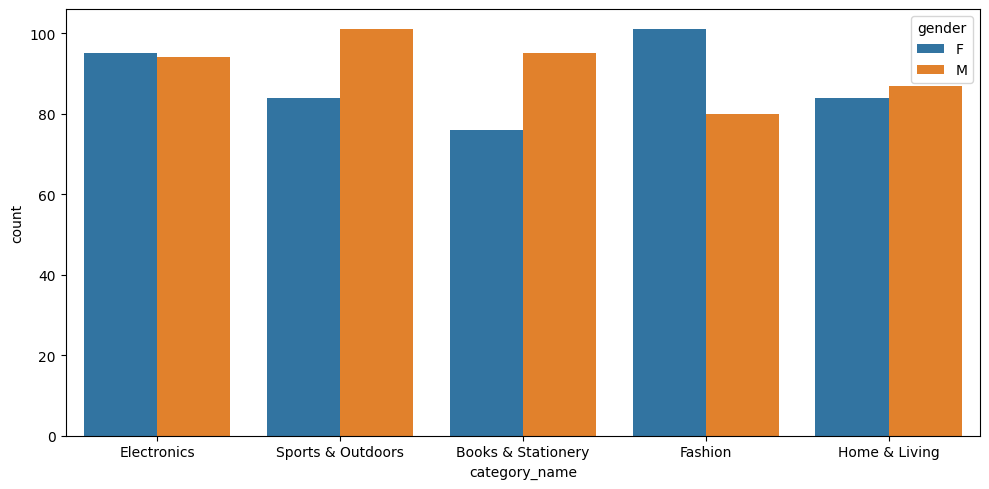

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='category_name', hue='gender')
plt.tight_layout()

- more male customers in 'sports & outdoor' and 'Books & stationary' category while 
more female customers in 'Fashion' category

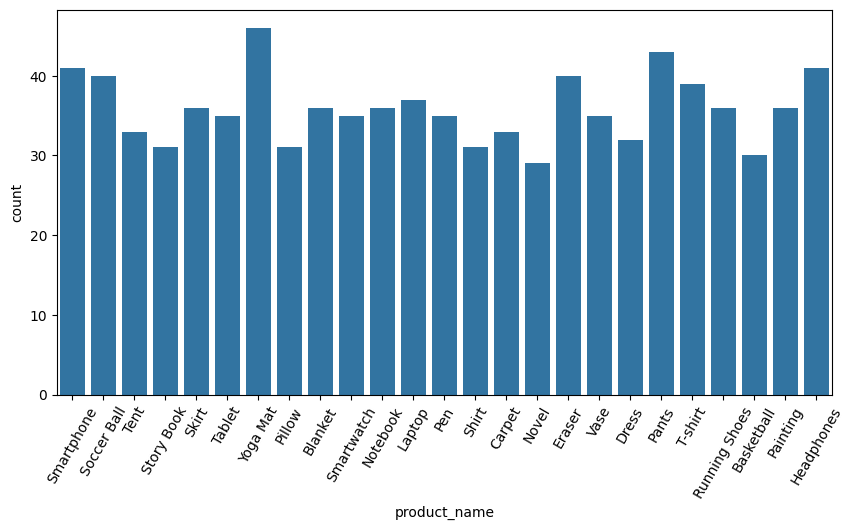

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='product_name')
plt.xticks(rotation=60)
plt.show()

- yoga mat is highest selling product

<Axes: xlabel='count', ylabel='payment_method'>

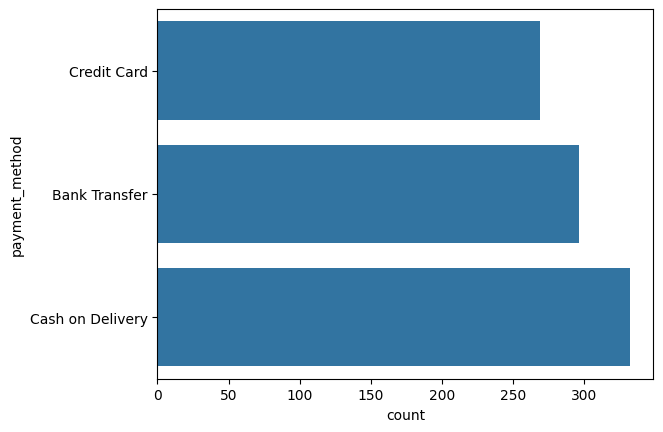

In [19]:
sns.countplot(data=df, y='payment_method')

<Axes: xlabel='count', ylabel='payment_method'>

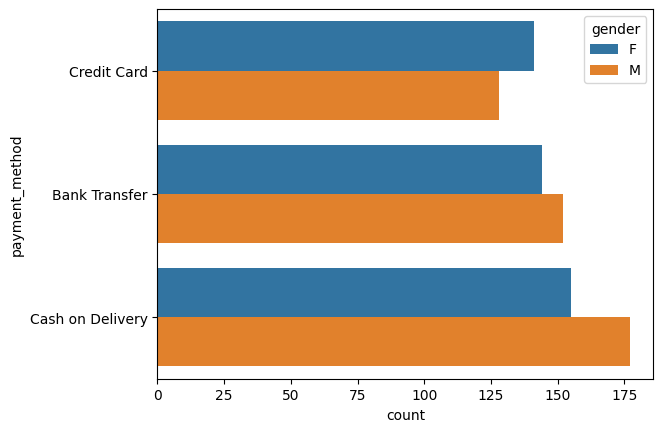

In [26]:
sns.countplot(data=df, y='payment_method', hue='gender')

<Axes: xlabel='age', ylabel='Count'>

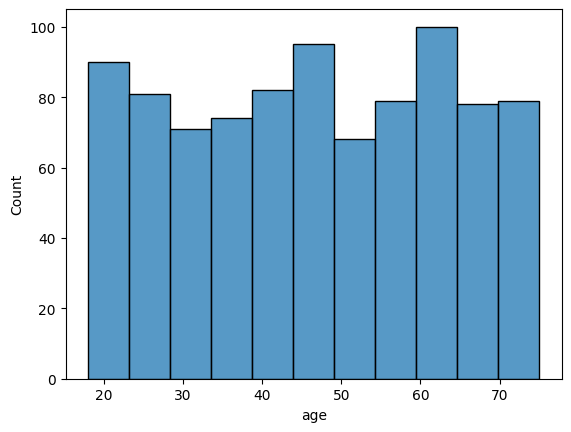

In [20]:
sns.histplot(data=df, x='age')

<Axes: xlabel='price', ylabel='Count'>

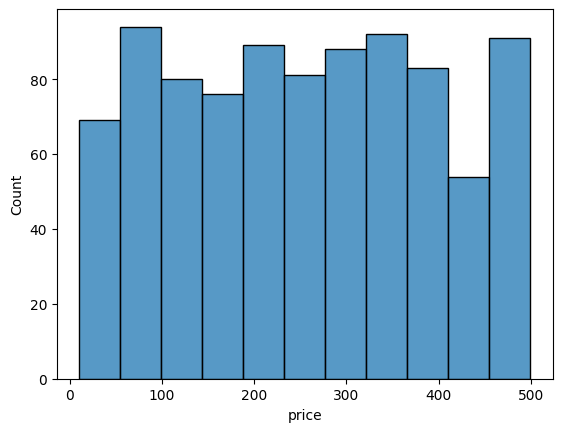

In [21]:
sns.histplot(data=df, x='price')

<Axes: xlabel='gender', ylabel='count'>

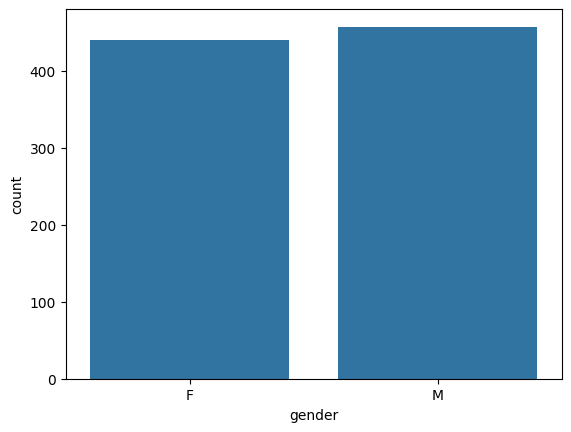

In [29]:
sns.countplot(data=df, x='gender')